In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%pylab inline

from datetime import datetime,timedelta
import re

import time

from scipy import stats

import seaborn as sns

import sys
reload(sys)
sys.setdefaultencoding('utf-8')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('imbalanced_merged.csv')

In [28]:
temp_data = data[['is_install', u'is_publisher', u'developer', u'content_rating', u'genres', u'current_version_user_ratings',
       u'n_current_version_user_ratings', u'user_rating', u'n_user_ratings', u'min_os_version',
       u'supported_devices', u'package_name', u'primary_category', u'has_in_app_purchases', 
       u'genres_publisher', u'current_version_user_ratings_publisher',
       u'n_current_version_user_ratings_publisher', u'user_rating_publisher',
       u'n_user_ratings_publisher', u'price_currency_code_publisher',
       u'price_value_publisher', u'min_os_version_publisher',
       u'package_name_publisher', u'primary_category_publisher',
       u'has_in_app_purchases_publisher','price_value']]

In [4]:
temp_data.ix[0,:]

is_install                                                                      0
is_publisher                                                                    f
developer                                                         Product Madness
content_rating                                                               Teen
genres                                                                        NaN
current_version_user_ratings                                                  NaN
n_current_version_user_ratings                                                NaN
user_rating                                                               4.38363
n_user_ratings                                                             150963
min_os_version                                                                NaN
supported_devices                                                             NaN
package_name                                         com.productmadness.hovmobile
primary_category

#### check how many levels in each feature

In [5]:
for col in temp_data.columns:
    if type(temp_data[col][0]) != list:
        print col, ":", len(temp_data[col].unique())

In [ ]:
# def str2list(x):
#     if x == 'nan':
#         return None
#     else:
#         return eval(x)
    
# temp_data['languages'] = temp_data['languages'].apply(lambda x: str2list(str(x)))
# temp_data['genres'] = temp_data['genres'].apply(lambda x: str2list(str(x)))
# temp_data['languages_publisher'] = temp_data['languages_publisher'].apply(lambda x: str2list(str(x)))

# temp_data_im['languages'] = temp_data_im['languages'].apply(lambda x: str2list(str(x)))
# temp_data_im['genres'] = temp_data_im['genres'].apply(lambda x: str2list(str(x)))
# temp_data_im['languages_publisher'] = temp_data_im['languages_publisher'].apply(lambda x: str2list(str(x)))

In [6]:
def percent_df(df, col1, col2):
    counts = pd.crosstab(df[col1], df[col2])
    return counts.div(counts.sum(1).astype(float), axis=0)

def percent_plot(percent_df):
    plt.figure(figsize=(800,1000))
    ax = percent_df.plot(kind='barh',stacked=True, alpha=0.8, figsize=(8,6))
    ax.set_xlabel("Percentage", fontsize=12)
    ax.set_ylabel("Is Install", fontsize=12)
    ax.legend(loc=0, prop={'size':7})
    plt.show()

In [7]:
data_install = temp_data[temp_data['is_install'] == 1]
data_install

,is_install,is_publisher,developer,content_rating,genres,current_version_user_ratings,n_current_version_user_ratings,user_rating,n_user_ratings,min_os_version,...,current_version_user_ratings_publisher,n_current_version_user_ratings_publisher,user_rating_publisher,n_user_ratings_publisher,price_currency_code_publisher,price_value_publisher,min_os_version_publisher,package_name_publisher,primary_category_publisher,has_in_app_purchases_publisher
2,1,f,BitMango Corporation,4+,"[""Games"",""Entertainment"",""Board"",""Word""]",4.5,9414.0,4.500000,42531.0,6.0,...,4.5,476.0,4.500000,132375.0,NaN,0.00,7.0,NaN,NaN,NaN
5,1,f,Gamesofa Global Limited,Teen,NaN,NaN,NaN,4.593970,35027.0,NaN,...,NaN,NaN,3.996311,608813.0,NaN,0.00,NaN,com.playappking.busrush,GAME_ACTION,t
13,1,f,BitMango,Everyone,NaN,NaN,NaN,4.545188,233169.0,NaN,...,NaN,NaN,4.482342,37150.0,NaN,0.00,NaN,com.ekkorr.endlessfrontier.global,GAME_ROLE_PLAYING,t
18,1,f,Fun Games For Free,4+,"[""Entertainment"",""Book""]",4.5,4279.0,5.000000,231966.0,8.0,...,4.0,111.0,4.500000,19712.0,NaN,0.00,8.1,NaN,NaN,NaN
21,1,f,BitMango,Everyone,NaN,NaN,NaN,4.514041,60073.0,NaN,...,NaN,NaN,4.572593,2772061.0,NaN,0.00,NaN,com.playrix.township,GAME_CASUAL,t
24,1,f,PLR Worldwide Sales Limited,4+,"[""Games"",""Entertainment"",""Adventure"",""Simulati...",4.5,661.0,4.500000,73374.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1,f,Rovio Entertainment Ltd.,Everyone,NaN,NaN,NaN,4.486835,2085688.0,NaN,...,NaN,NaN,3.996311,608813.0,NaN,0.00,NaN,com.playappking.busrush,GAME_ACTION,t
27,1,f,BitMango Corporation,4+,"[""Games"",""Entertainment"",""Board"",""Word""]",4.5,9414.0,4.500000,42531.0,6.0,...,4.0,155.0,4.500000,6203.0,NaN,0.00,8.0,NaN,NaN,NaN
37,1,f,Peak Games,4+,"[""Games"",""Arcade"",""Puzzle""]",4.5,976.0,4.500000,63526.0,7.0,...,4.5,9414.0,4.500000,42531.0,NaN,0.00,6.0,NaN,NaN,NaN
42,1,f,Movga Games,Everyone 10+,NaN,NaN,NaN,3.686553,8180.0,NaN,...,NaN,NaN,4.180387,947795.0,NaN,0.00,NaN,com.xs.armysniper,GAME_ACTION,t


In [17]:
def get_conversion_table(col):
    ins = pd.DataFrame(data_install.groupby(col)['is_install'].count().rename('install_counts')).reset_index()
    total = pd.DataFrame(temp_data.groupby(col)['is_install'].count().rename('total_counts')).reset_index()
    counts_ad = total.merge(ins, how = 'left', on = col).fillna(0.0)
    counts_ad['conversion'] = counts_ad['install_counts']/counts_ad['total_counts']
    return counts_ad.sort_values('conversion', ascending = False)

def plot_coversion(df, col):
    plt.figure(figsize=(10, 8))
    df[['conversion']].plot(kind='barh',stacked=True, alpha=0.8)
    plt.xlabel("Conversion", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.yticks(range(len(df[col].unique())), df[col], fontsize=10)
    plt.legend(loc=0,prop={'size':12})
    plt.show()

### is_publisher

In [9]:
counts_pb = get_conversion_table('is_publisher')
counts_pb

,is_publisher,total_counts,install_counts,conversion
0,f,699425,134951,0.192946
1,t,575,98,0.170435


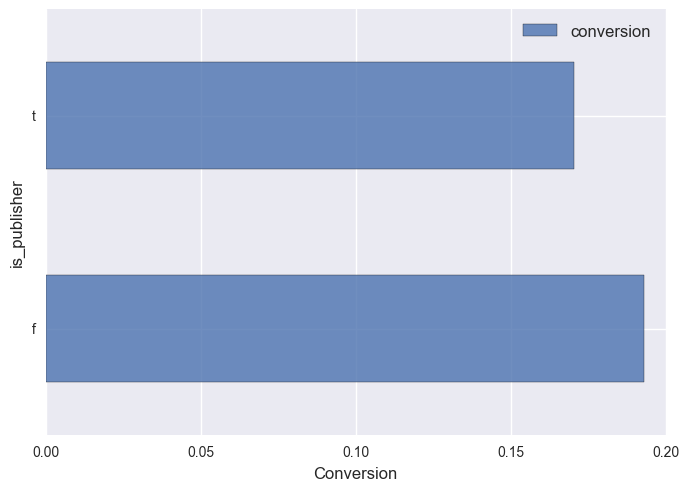

In [18]:
plot_coversion(counts_pb,'is_publisher')

### developer

In [15]:
counts_dev = get_conversion_table('developer')
counts_dev

,developer,total_counts,install_counts,conversion
455,wen zheng,2,2.0,1.000000
158,"Hero Entertainment Co., Ltd.",1,1.0,1.000000
317,Playtika LTD,1,1.0,1.000000
365,Slots Limited,7,4.0,0.571429
84,DoubleUGames,88,49.0,0.556818
386,Top Free Games,128,70.0,0.546875
296,PerBlue Inc,2,1.0,0.500000
297,"Perfliq Games, LLC",2,1.0,0.500000
47,BitMango Corporation,34202,16392.0,0.479270
231,Melsoft Games,94,43.0,0.457447


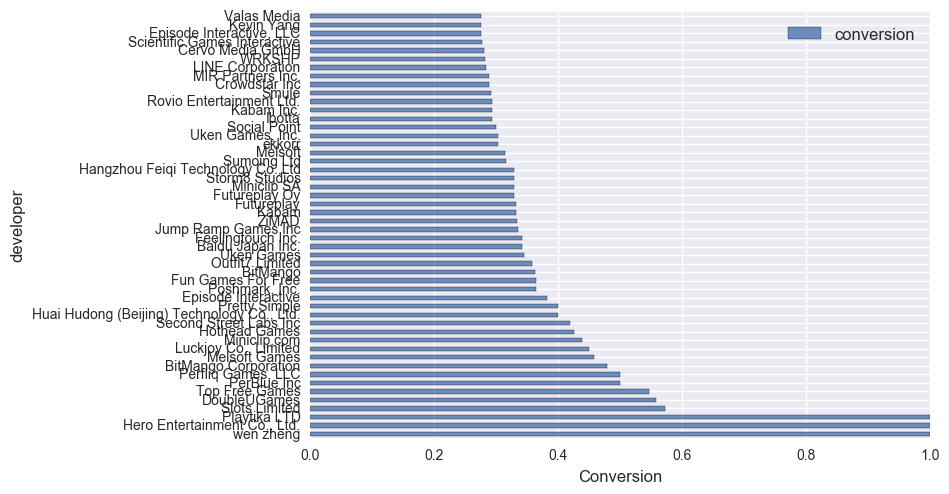

In [19]:
plot_coversion(counts_dev.iloc[:50,:], 'developer')

### content_rating

In [20]:
temp_data['content_rating'][temp_data['content_rating'] == 'Mature 17+'] = '17+'
temp_data['content_rating'][temp_data['content_rating'] == 'Teen'] = '12+'
temp_data['content_rating'][temp_data['content_rating'] == 'Everyone 10+'] = '10+'

In [21]:
counts_cr = get_conversion_table('content_rating')
counts_cr

,content_rating,total_counts,install_counts,conversion
3,4+,152622,39179.0,0.256706
5,Everyone,232371,47729.0,0.205400
4,9+,30693,3944.0,0.128498
2,17+,34119,2906.0,0.085172
1,12+,184468,14252.0,0.077260
0,10+,34701,0.0,0.000000


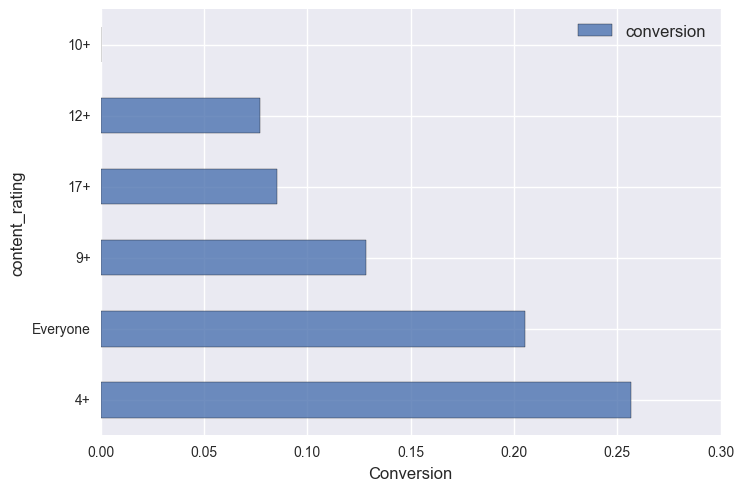

In [22]:
plot_coversion(counts_cr, 'content_rating')

### current_version_user_ratings

In [23]:
counts_cur = get_conversion_table('current_version_user_ratings')
counts_cur

,current_version_user_ratings,total_counts,install_counts,conversion
7,4.5,197982,47003.0,0.237410
0,1.0,446,99.0,0.221973
5,3.5,3241,690.0,0.212897
8,5.0,17290,3485.0,0.201562
3,2.5,2455,486.0,0.197963
6,4.0,45308,7947.0,0.175399
2,2.0,452,73.0,0.161504
4,3.0,2933,276.0,0.094102
1,1.5,5,0.0,0.000000


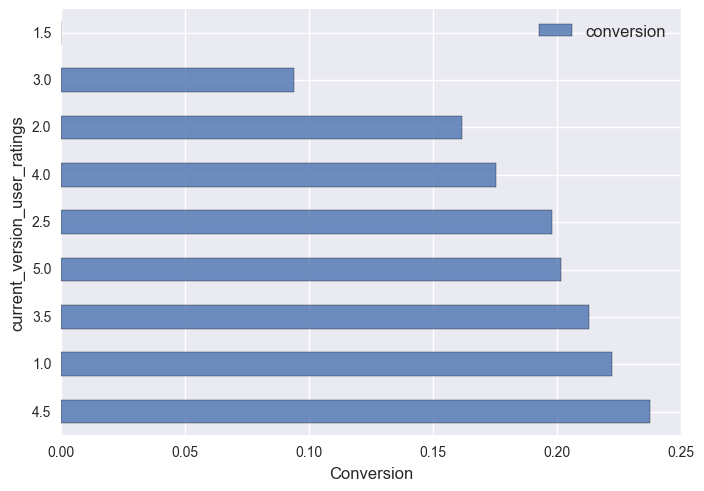

In [24]:
plot_coversion(counts_cur, 'current_version_user_ratings')

### user_rating

In [25]:
temp_data['user_rating_round'] = temp_data['user_rating'].apply(lambda x: round(x,1))
data_install['user_rating_round'] = data_install['user_rating'].apply(lambda x: round(x,1))
counts_ur = get_conversion_table('user_rating_round')
counts_ur

,user_rating_round,total_counts,install_counts,conversion
21,5.0,24588,6812.0,0.277046
17,4.5,316968,77555.0,0.244678
20,4.8,2569,463.0,0.180226
12,4.0,52389,8741.0,0.166848
1,2.5,300,49.0,0.163333
15,4.3,29342,4751.0,0.161918
18,4.6,45907,7004.0,0.152569
16,4.4,63483,9669.0,0.152308
6,3.4,148,21.0,0.141892
14,4.2,54885,7691.0,0.140129


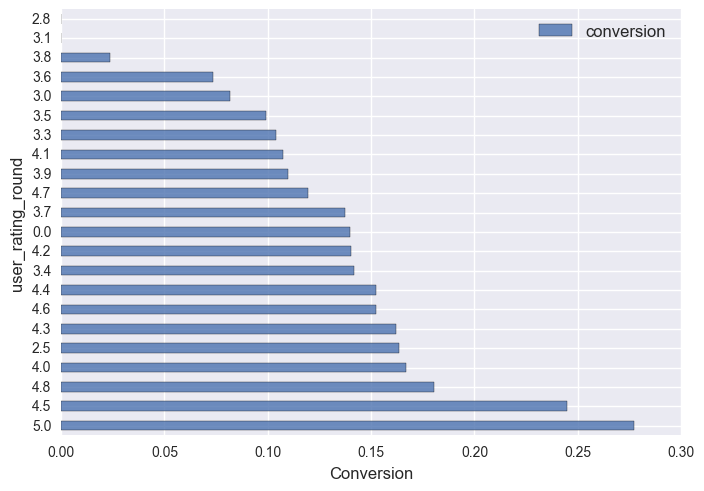

In [26]:
plot_coversion(counts_ur, 'user_rating_round')

### price_value   <- useless

In [29]:
counts_pv = get_conversion_table('price_value')
counts_pv

KeyError: 'price_value'

### min_os_version

In [ ]:
temp_data['min_os_version'][temp_data['min_os_version'] == '6'] = '6.0'
temp_data['min_os_version'][temp_data['min_os_version'] == '7'] = '7.0'
data_install['min_os_version'][data_install['min_os_version'] == '6'] = '6.0'
data_install['min_os_version'][data_install['min_os_version'] == '7'] = '7.0'

In [ ]:
counts_mov = get_conversion_table('min_os_version')
counts_mov

In [ ]:
plot_coversion(counts_mov, 'min_os_version')

### package_name

In [ ]:
counts_pn = get_conversion_table('package_name')
counts_pn

In [ ]:
plot_coversion(counts_pn.iloc[:50,:], 'package_name')

### primary_category

In [ ]:
counts_pc = get_conversion_table('primary_category')
counts_pc

In [ ]:
plot_coversion(counts_pc, 'primary_category')

### has_in_app_purchases

In [ ]:
counts_iap = get_conversion_table('has_in_app_purchases')
counts_iap

In [ ]:
plot_coversion(counts_iap, 'has_in_app_purchases')

### current_version_user_ratings_publisher

In [ ]:
counts_vurp = get_conversion_table('current_version_user_ratings_publisher')
counts_vurp

In [ ]:
plot_coversion(counts_vurp, 'current_version_user_ratings_publisher')

### user_rating_publisher

In [ ]:
temp_data['user_rating_publisher_round'] = temp_data['user_rating_publisher'].apply(lambda x: round(x))
data_install['user_rating_publisher_round'] = data_install['user_rating_publisher'].apply(lambda x: round(x))
counts_urp = get_conversion_table('user_rating_publisher_round')
counts_urp

In [ ]:
plot_coversion(counts_urp, 'user_rating_publisher_round')

### price_currency_code_publisher <- useless

In [ ]:
counts_pc = get_conversion_table('price_currency_code_publisher')
counts_pc

### price_value_publisher

In [ ]:
counts_pvp = get_conversion_table('price_value_publisher')
counts_pvp

### min_os_version_publisher

In [ ]:
temp_data['min_os_version_publisher'][temp_data['min_os_version_publisher'] == '6'] = '6.0'
temp_data['min_os_version_publisher'][temp_data['min_os_version_publisher'] == '7'] = '7.0'
temp_data['min_os_version_publisher'][temp_data['min_os_version_publisher'] == '8'] = '8.0'
data_install['min_os_version_publisher'][data_install['min_os_version_publisher'] == '8'] = '8.0'
data_install['min_os_version_publisher'][data_install['min_os_version_publisher'] == '6'] = '6.0'
data_install['min_os_version_publisher'][data_install['min_os_version_publisher'] == '7'] = '7.0'

counts_movp = get_conversion_table('min_os_version_publisher')
counts_movp

#### don't know the difference betwen 'min_os_version' and 'min_os_version_publisher'

In [ ]:
temp_data[['min_os_version','min_os_version_publisher']]

In [ ]:
plot_coversion(counts_movp, 'min_os_version_publisher')

### package_name_publisher  <- useless

In [ ]:
counts_pnp = get_conversion_table('package_name_publisher')
counts_pnp

### primary_category_publisher

In [ ]:
counts_pnp = get_conversion_table('primary_category_publisher')
counts_pnp

In [ ]:
plot_coversion(counts_pnp, 'primary_category_publisher')

### has_in_app_purchases_publisher

In [ ]:
counts_inapp = get_conversion_table('has_in_app_purchases_publisher')
counts_inapp

In [ ]:
plot_coversion(counts_inapp, 'has_in_app_purchases_publisher')